In [277]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import datetime as DT

sns.set(style="darkgrid")
pd.set_option('float_format', '{:f}'.format)

dfMA = pd.read_csv('../max_activity.csv') #MA = max_activity
dfMM = pd.read_csv('../max_member.csv') #MM = max_member
dfPT = pd.read_csv('../policy_table.csv') #PT = policy_table

dfMA.columns = ['id', 'created_date', 'type', 'category', 'activity', 'name', 'customer_id', 'id_hash']
dfMM.columns = ['member_type', 'registration', 'gained_point', 'spent_point', 'current_point', 'last_login', 'language', 'gender', 'dob', 'premium_paid', 'optoutstatus', 'status', 'customer_id', 'id_hash']
dfPT.columns = ['customer_id', 'issue_date', 'end_date', 'termination_date', 'account_status', 'product_category', 'product_group', 'policy_hash']

## Display top table of 3 in order: activity, member & policy

In [278]:
display(dfMA.head())
display(dfMM.head())
display(dfPT.head())

#display(dfMA.info())
#display(dfMM.info())
#display(dfPT.info())

,id,created_date,type,category,activity,name,customer_id,id_hash
0,13253737,2021-11-18 18:19:49,MemberActivity,MemberActivity,Login,Login,0ae1f0949e855809add49acd655d80531582db4fc1433b...,17dc5687d8570a012deffc7c3701015d110e7552a4ec27...
1,247365,2021-12-09 11:17:40,Event,Wealth,RegisterLuckyDraws,FWD MAX brings you annual premium lucky draw!,0ae1f0949e855809add49acd655d80531582db4fc1433b...,17dc5687d8570a012deffc7c3701015d110e7552a4ec27...
2,14150697,2021-12-09 11:16:18,MemberActivity,MemberActivity,Login,Login,0ae1f0949e855809add49acd655d80531582db4fc1433b...,17dc5687d8570a012deffc7c3701015d110e7552a4ec27...
3,13154387,2021-11-07 21:34:18,MemberActivity,MemberActivity,Login,Login,0ae1f0949e855809add49acd655d80531582db4fc1433b...,17dc5687d8570a012deffc7c3701015d110e7552a4ec27...
4,204495,2021-11-16 15:43:43,Event,Music & Art,RegisterLuckyDraws,“FWD Presents: Jason Chan Fight For _____ Live...,0ae1f0949e855809add49acd655d80531582db4fc1433b...,17dc5687d8570a012deffc7c3701015d110e7552a4ec27...


,member_type,registration,gained_point,spent_point,current_point,last_login,language,gender,dob,premium_paid,optoutstatus,status,customer_id,id_hash
0,Life Customer,Tied Agency,3500.000000,0.000000,0.000000,NaN,en,M,1984,83721.220000,IN,PreRegistered,e8d58359cc7e7e295143e1a3413a41c2c73758c5591d2c...,68755159f15d0a002d16528e1cbeecdb4d4ebdb0841d51...
1,Life Customer,Brokers,4838.000000,1000.000000,1338.000000,2022-09-01 08:32:19.000000,en,M,1962,138207.430000,IN,Active,07a92897fa1c26d8a27d7c5c3ad6e94f78c9eb5dfeb8bb...,309ee210d7a4fb8e15b0e687b0f3ec3b4bfa3337d6bc12...
2,Life Customer,Tied Agency,3500.000000,0.000000,0.000000,NaN,en,M,1993,31295.000000,OUT,PreRegistered,f644e812232df5d402e6bf7516d6b5f46a190ce5592efa...,4bb756bddde414e7a09c323b91f5b675fdbdb86b6786ce...
3,GI Customer,NaN,3500.000000,0.000000,0.000000,NaN,zh-HK,M,1949,0.000000,IN,PreRegistered,aa16afe69503cebdd373ed61ccadee5a3bc4b025418b92...,8356810a99375e128945a45df2f75ed4aac01371860955...
4,GI Customer,NaN,3500.000000,0.000000,0.000000,NaN,en,F,1975,0.000000,OUT,PreRegistered,83f02429730435461db05a53c4496ec44e3e372176aba4...,2002dce1b495d68c67af97908c3d8f50f4fd387f79b134...


,customer_id,issue_date,end_date,termination_date,account_status,product_category,product_group,policy_hash
0,8b7b983996fa63c19482dc443d7f0535beadeb810b8816...,1986-01-01,NaN,1989-12-01,Surrendered,Universal Life,Life,e40beb0ecb5fcc16d68c3dba82584828427dc22e2558fc...
1,8b7b983996fa63c19482dc443d7f0535beadeb810b8816...,1987-01-01,NaN,2002-06-19,Surrendered,Whole Life,Life,add41954cb1b82a7558394d0d9a5ba993a08274330475c...
2,8b7b983996fa63c19482dc443d7f0535beadeb810b8816...,1987-01-01,NaN,1990-02-19,Surrendered,Universal Life,Life,65bc2f1ca61515d790e2b9a02e76e40c0f0da97e5f685e...
3,8b7b983996fa63c19482dc443d7f0535beadeb810b8816...,1988-01-25,NaN,1990-02-18,Lapsed,Whole Life,Life,e15c976e008bd4f3a50cc50f3c46b986faf7290a3ccd77...
4,8b7b983996fa63c19482dc443d7f0535beadeb810b8816...,1988-01-01,NaN,1998-05-11,Surrendered,Universal Life,Life,0241626f9d7405e529b2982836e17554c882553bffceb4...


# Activity Data
'id', 'created_date', 'type', 'category', 'activity', 'name', 'customer_id', 'id_hash'

In [279]:
display(len(dfMA))   #it has 976528 ids
display(len(dfMA['id'].drop_duplicates())) #it has 974454 unique ids
display(len(dfMA['customer_id'].drop_duplicates())) # 24137 unique customers

976528

974454

24137

In [325]:
display(dfMA['type'].value_counts())
display(dfMA['category'].value_counts())
display(dfMA['activity'].value_counts())
display(dfMA['name'].value_counts())

Article           64281
MemberActivity    24083
Redemption        22121
Event             19342
Moment            13715
Game               4467
MGM                 111
Name: type, dtype: int64

Food & Wine           32505
Sport & Action        24932
MemberActivity        24083
Music & Art           19925
Health                13062
Just For You          12921
Wealth                 6063
Travel & Adventure     4335
Lifestyle              4285
Happy Wednesday        1158
Merchant Offers         273
MGM                     111
Name: category, dtype: int64

MemberRatedContent                     45638
Login                                  24083
Redemption                             22121
RegisterLuckyDraws                     19324
MemberSharedArticle                    18661
MemberLikedContent                     13715
FinishGame                              4467
ReferredMemberCompletedRegistration      111
Name: activity, dtype: int64

Login                                                                                               24083
FWD MAX brings you annual premium lucky draw!                                                        5928
FWD Exclusively Presents: PolyGram 50th Anniversary Concert Ticket Lucky Draw                        5073
“FWD Presents: Jason Chan Fight For _____ Live In Hong Kong Coliseum” Ticket Lucky Draw              4703
X'mas Gifting Mission                                                                                4467
                                                                                                    ...  
It’s Sunmer Time                                                                                        1
Explore HK                                                                                              1
冲繩海岸                                                                                                    1
【Up to 20% off】Pneumococcal 13-valent conjugat

## Activity's type data

<AxesSubplot:ylabel='type'>

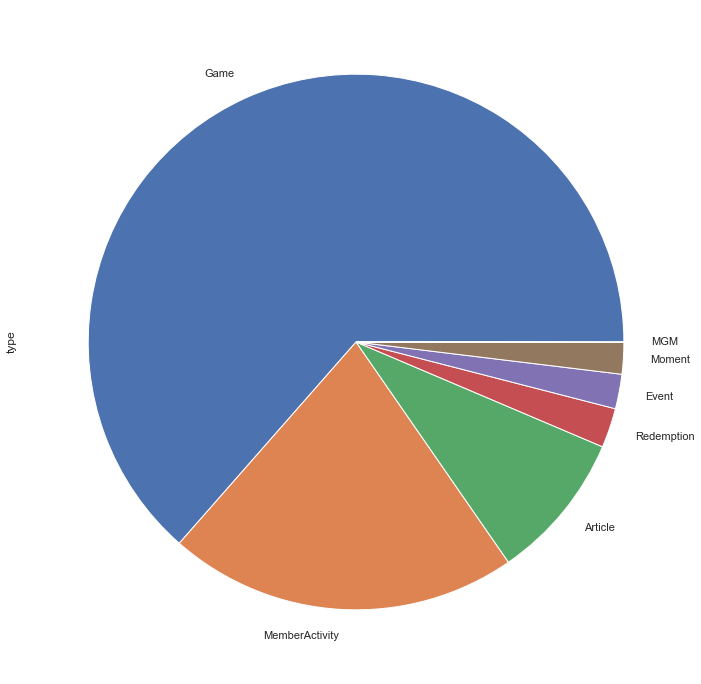

In [281]:
dfMA['type'].value_counts().plot(kind='pie', figsize=(12, 24))

Text(0, 0.5, 'Total')

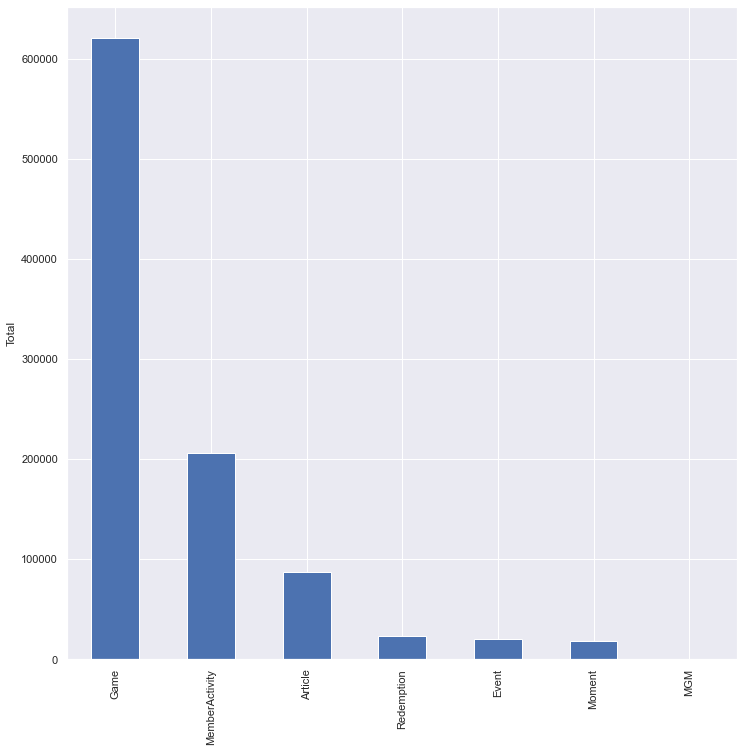

In [282]:
ax = dfMA['type'].value_counts().plot(kind='bar', figsize=(12, 12))
ax.set_ylabel('Total')

## Activity's Category

<AxesSubplot:ylabel='category'>

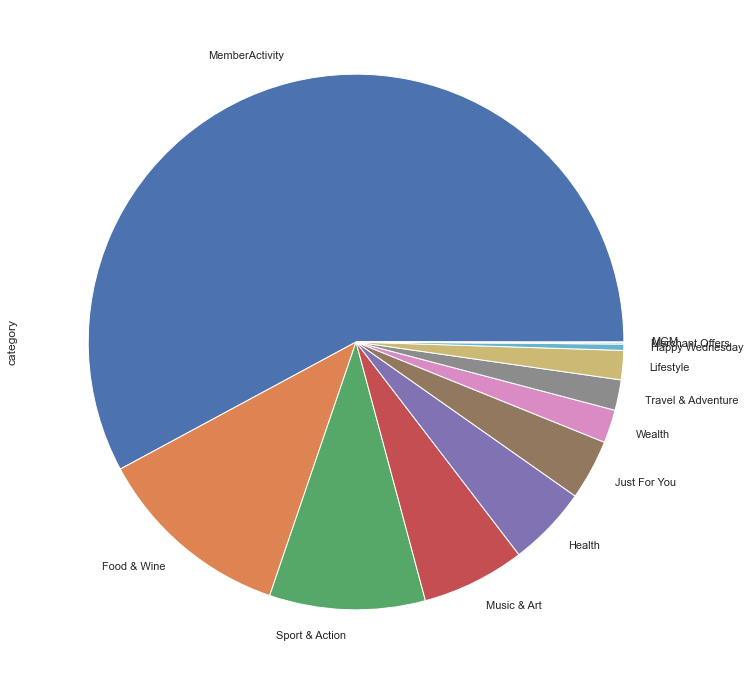

In [283]:
dfMA['category'].value_counts().plot(kind='pie', figsize=(12, 24))

Text(0, 0.5, 'Total')

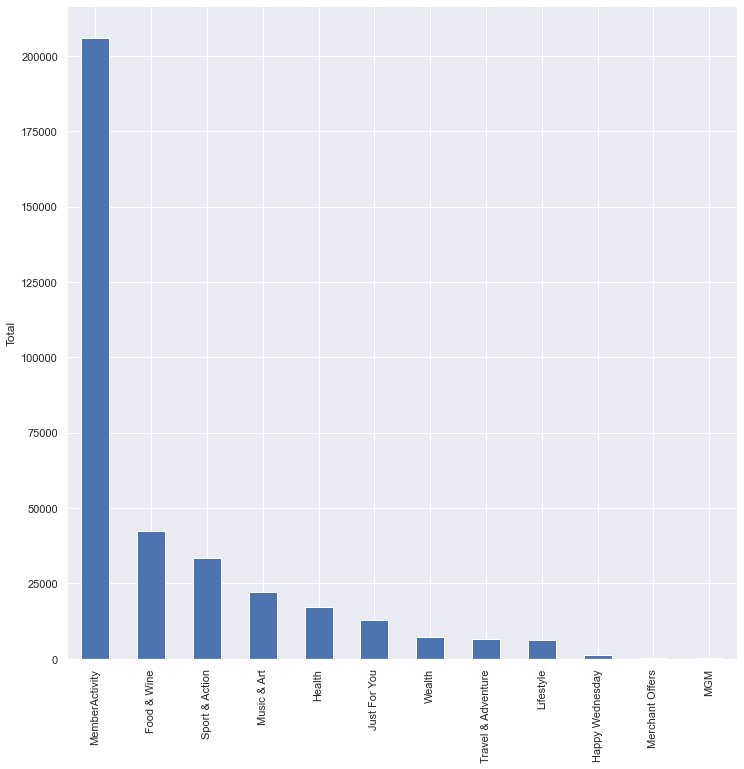

In [284]:
ax = dfMA['category'].value_counts().plot(kind='bar', figsize=(12, 12))
ax.set_ylabel('Total')

## Activity's activity

<AxesSubplot:ylabel='activity'>

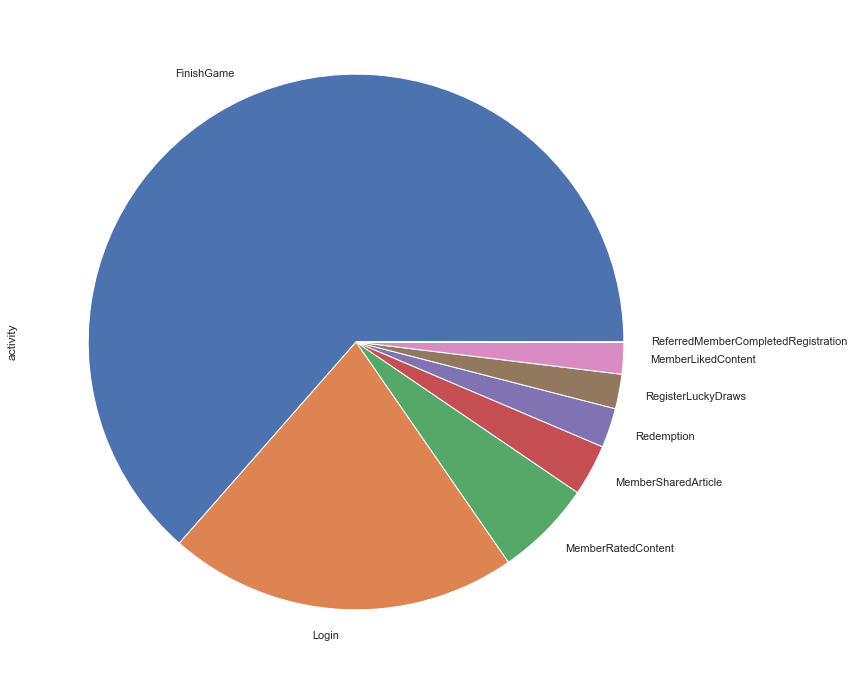

In [285]:
dfMA['activity'].value_counts().plot(kind='pie', figsize=(12, 24))

Text(0, 0.5, 'Total')

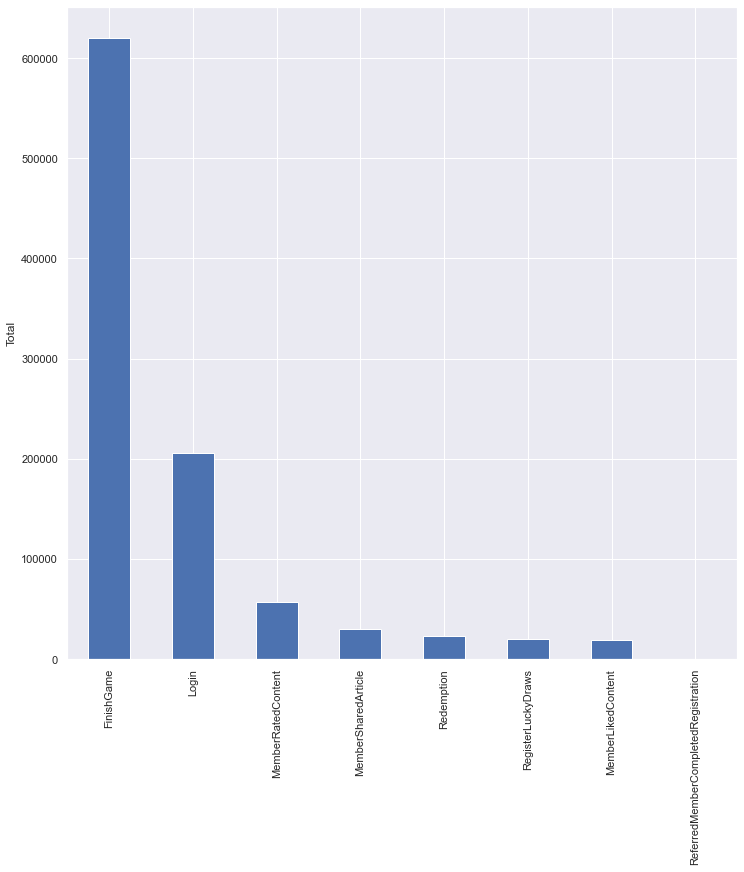

In [286]:
ax = dfMA['activity'].value_counts().plot(kind='bar', figsize=(12, 12))
ax.set_ylabel('Total')

# RFE Analysis on Activity data
## Activity - Recency

In [287]:
display(dfMA['created_date'].min())
display(dfMA['created_date'].max())

# Looks like Activity Data is 3 months. 

'2021-10-01 00:02:34'

'2021-12-31 23:59:34'

In [288]:
dfMA.created_date = pd.to_datetime(dfMA.created_date)
now = DT.datetime(2021, 12, 31, 23, 59, 59) #<---- the last of the 3rd month
recency_dfMA = dfMA.groupby(by='customer_id', as_index=False)['created_date'].max()
recency_dfMA['Recency'] = recency_dfMA['created_date'].apply(lambda x: (now - x).days)
recency_dfMA.drop('created_date',axis=1,inplace=True)
recency_dfMA.head()

# this is recency action within 3 months

,customer_id,Recency
0,000152e15dc8b596ce46e06de1a30751d072a0311a1579...,48
1,000204c71a22228b56833e96aa83a6060fd1e9c6224c27...,16
2,000306cda80494b8f07e69c10ff980353a22b7410c53c2...,29
3,0005c96f36b9797b3da74d7d617c7b0e42c13fcf5c4d3e...,0
4,0008f8d25ac0ab9477b66fecdf888b6378779dbb687f30...,32


## Activity - Frequency

In [289]:
dfMA_copy = dfMA;
dfMA_copy.drop_duplicates(subset = ['id', 'customer_id'], keep = "first", inplace = True)

freqdfMA = dfMA_copy.groupby(by=['customer_id'], as_index=False)['id'].count()
freqdfMA.columns = ['customer_id', 'Frequency']
freqdfMA.head()

# How many times a customer did visit and took action on the website?

,customer_id,Frequency
0,000152e15dc8b596ce46e06de1a30751d072a0311a1579...,3
1,000204c71a22228b56833e96aa83a6060fd1e9c6224c27...,10
2,000306cda80494b8f07e69c10ff980353a22b7410c53c2...,25
3,0005c96f36b9797b3da74d7d617c7b0e42c13fcf5c4d3e...,24
4,0008f8d25ac0ab9477b66fecdf888b6378779dbb687f30...,1


## Activity - Engagement

In [326]:
dfMA_copy = dfMA;
dfMA_copy.drop_duplicates(subset = ['name', 'customer_id'], keep = "first", inplace = True)

engdfMA = dfMA_copy.groupby(by=['customer_id'], as_index=False)['id'].count()
engdfMA.columns = ['customer_id', 'Engagement']
engdfMA.head(12)

# How many total of different actions which had been done by a customer?

,customer_id,Engagement
0,000152e15dc8b596ce46e06de1a30751d072a0311a1579...,2
1,000204c71a22228b56833e96aa83a6060fd1e9c6224c27...,5
2,000306cda80494b8f07e69c10ff980353a22b7410c53c2...,2
3,0005c96f36b9797b3da74d7d617c7b0e42c13fcf5c4d3e...,6
4,0008f8d25ac0ab9477b66fecdf888b6378779dbb687f30...,1
5,0009f02fa21dcff6626203200ba24f872cea9531dbb7d6...,1
6,000d9603ce5c20c8f35ec59215ae8a850f36cad7bf7e0a...,1
7,0012fe3e6ca7dc3f9d69dd8ebfa621dd39d8bb4dd8a56b...,1
8,00146fa6656418ab351a8dcc729f298558ae57f847ce39...,2
9,0015beabd11d0ae2690045c1f1f65f23b9d94fc63187a3...,2


## Activity - RFE table

In [327]:
dfMA_RF = recency_dfMA.merge(freqdfMA, on='customer_id')
dfMA_RFE = dfMA_RF.merge(engdfMA, on='customer_id')
dfMA_RFE.head(10)

,customer_id,Recency,Frequency,Engagement
0,000152e15dc8b596ce46e06de1a30751d072a0311a1579...,48,3,2
1,000204c71a22228b56833e96aa83a6060fd1e9c6224c27...,16,10,5
2,000306cda80494b8f07e69c10ff980353a22b7410c53c2...,29,25,2
3,0005c96f36b9797b3da74d7d617c7b0e42c13fcf5c4d3e...,0,24,6
4,0008f8d25ac0ab9477b66fecdf888b6378779dbb687f30...,32,1,1
5,0009f02fa21dcff6626203200ba24f872cea9531dbb7d6...,3,5,1
6,000d9603ce5c20c8f35ec59215ae8a850f36cad7bf7e0a...,81,1,1
7,0012fe3e6ca7dc3f9d69dd8ebfa621dd39d8bb4dd8a56b...,38,1,1
8,00146fa6656418ab351a8dcc729f298558ae57f847ce39...,65,2,2
9,0015beabd11d0ae2690045c1f1f65f23b9d94fc63187a3...,1,4,2


# Member Data
'member_type', 'registration', 'gained_point', 'spent_point', 'current_point', 'last_login', 'language', 'gender', 'dob', 'premium_paid', 'optoutstatus', 'status', 'customer_id', 'id_hash'

In [292]:
display(len(dfMM))   #it has 331518 ids
display(len(dfMM['customer_id'].drop_duplicates())) #it has 323985 unique ids

331518

323985

In [293]:
display(dfMM['member_type'].value_counts()) # has 2 types
display(dfMM['registration'].value_counts()) # has 9 differents
display(dfMM['language'].value_counts()) # has 2 languages
display(dfMM['gender'].value_counts()) # F= female, M = Male, U = ??, C = ??
display(dfMM['status'].value_counts()) # 8 status types

Life Customer    251946
GI Customer       79572
Name: member_type, dtype: int64

Tied Agency                 207086
Brokers                      25243
Bancassurance                17701
Alternative Distribution      8034
Direct to Customers           6695
DMTM-Own Base                 4074
DMTM-Partners                 1690
DMTM-CDC                      1629
DMTM-Hong Leong                149
Name: registration, dtype: int64

zh-HK    170519
en       153392
Name: language, dtype: int64

F    170738
M    140345
U     19246
C         2
Name: gender, dtype: int64

PreRegistered               212900
Active                       75035
Zombie Account               28330
Closed By Authentication      7404
N                             6996
Closed                         218
Pending Activation              13
PreRegister Fail                11
Name: status, dtype: int64

## Member Data - Member types

<AxesSubplot:ylabel='member_type'>

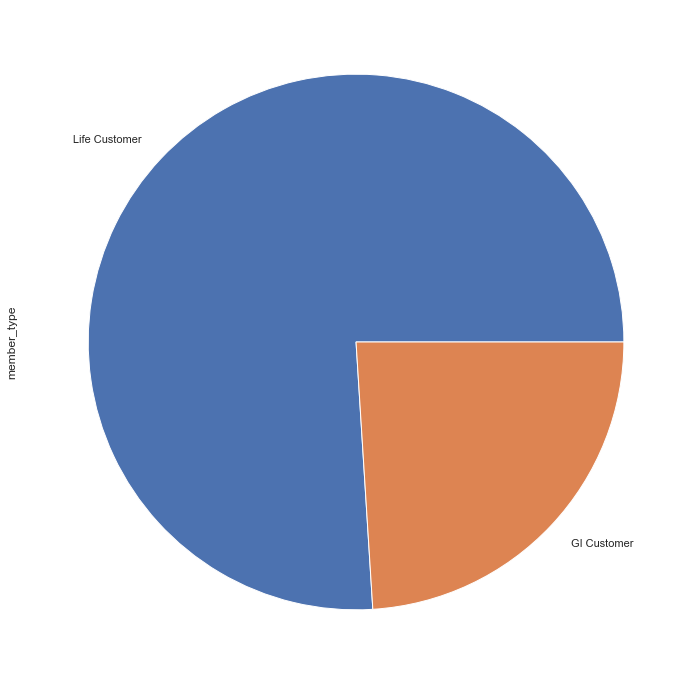

In [294]:
dfMM['member_type'].value_counts().plot(kind='pie', figsize=(12, 24))

Text(0, 0.5, 'Total')

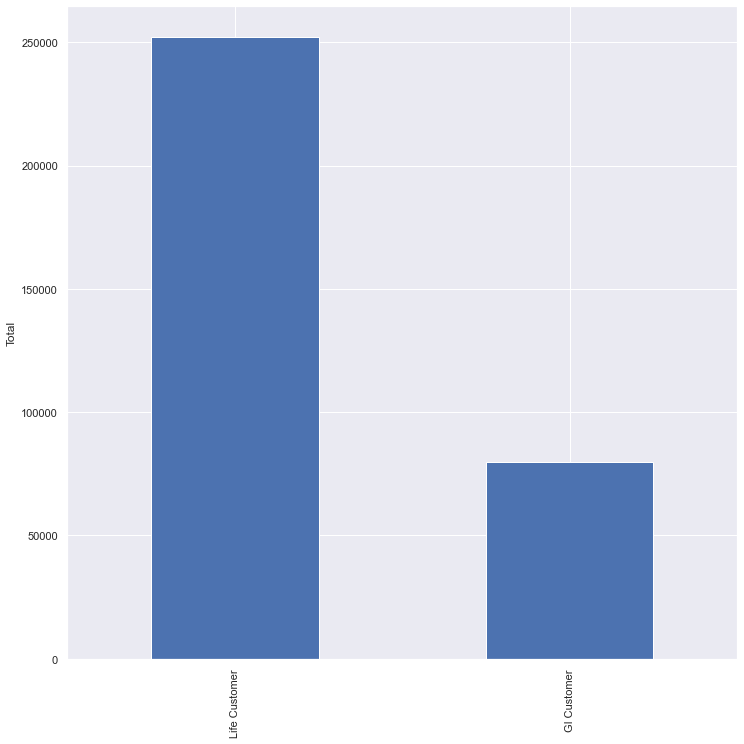

In [295]:
ax = dfMM['member_type'].value_counts().plot(kind='bar', figsize=(12, 12))
ax.set_ylabel('Total')

## Member Data - registration

<AxesSubplot:ylabel='registration'>

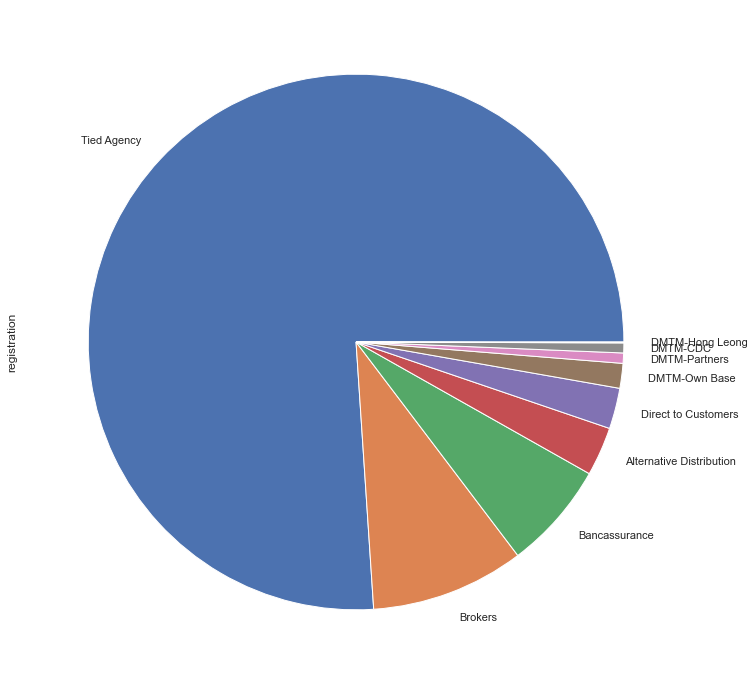

In [296]:
dfMM['registration'].value_counts().plot(kind='pie', figsize=(12, 24))

Text(0, 0.5, 'Total')

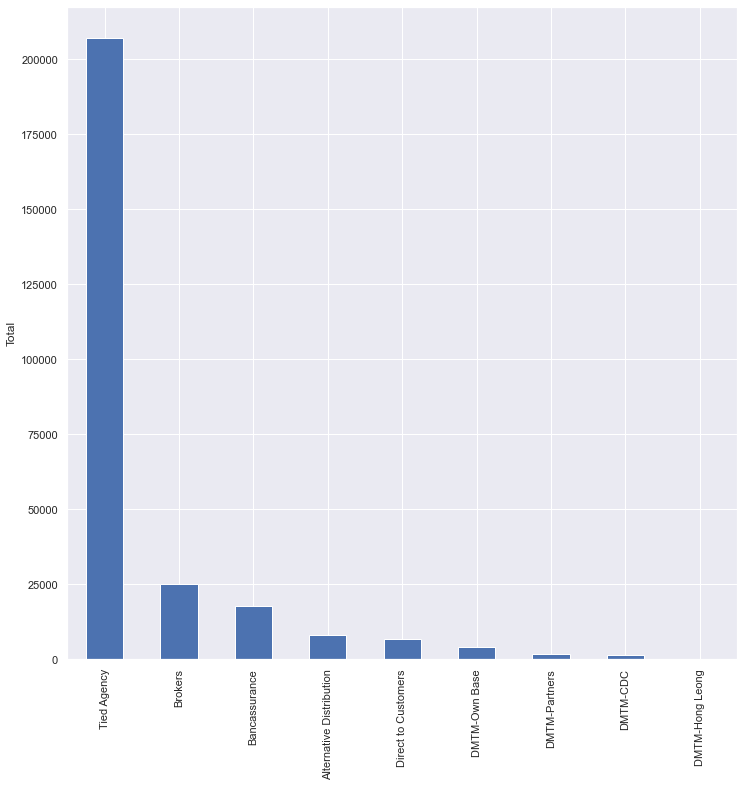

In [297]:
ax = dfMM['registration'].value_counts().plot(kind='bar', figsize=(12, 12))
ax.set_ylabel('Total')

## Member Data - language

<AxesSubplot:ylabel='language'>

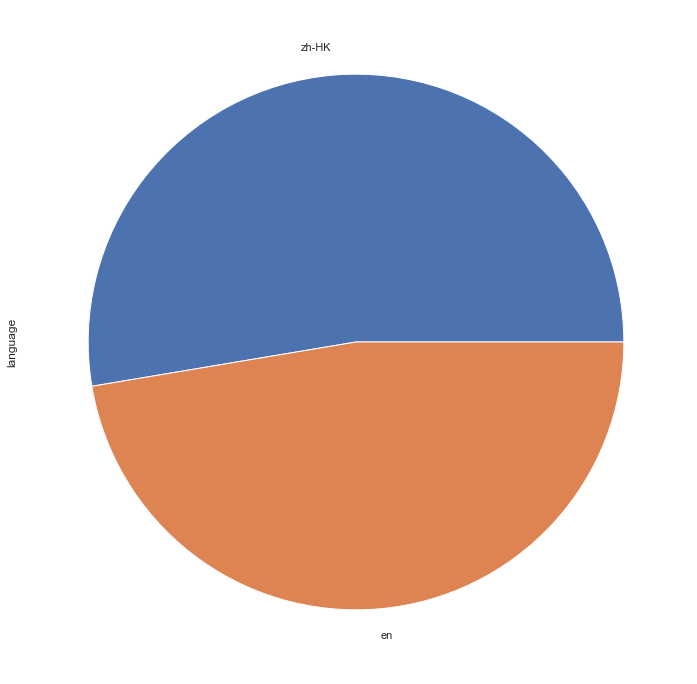

In [298]:
dfMM['language'].value_counts().plot(kind='pie', figsize=(12, 24))

Text(0, 0.5, 'Total')

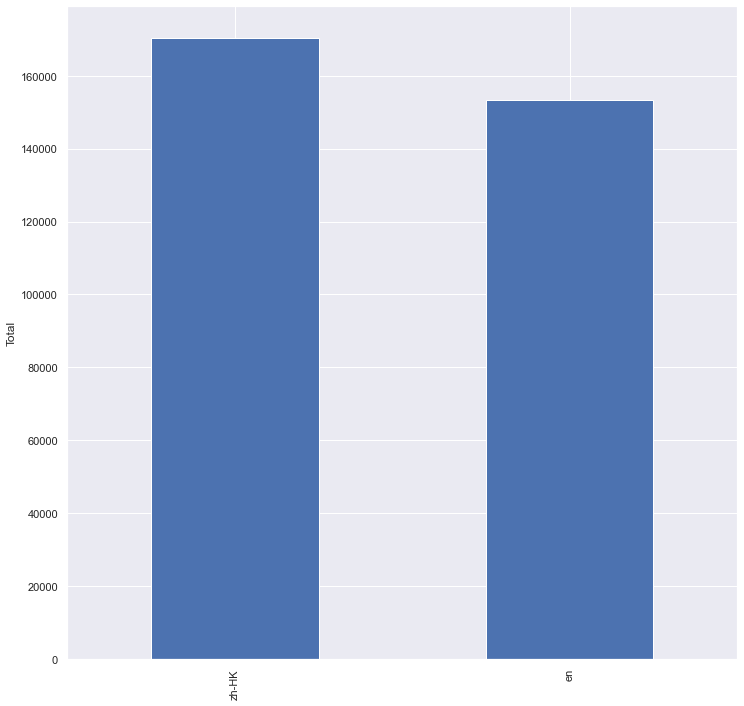

In [299]:
ax = dfMM['language'].value_counts().plot(kind='bar', figsize=(12, 12))
ax.set_ylabel('Total')

## Member Data - gender

<AxesSubplot:ylabel='gender'>

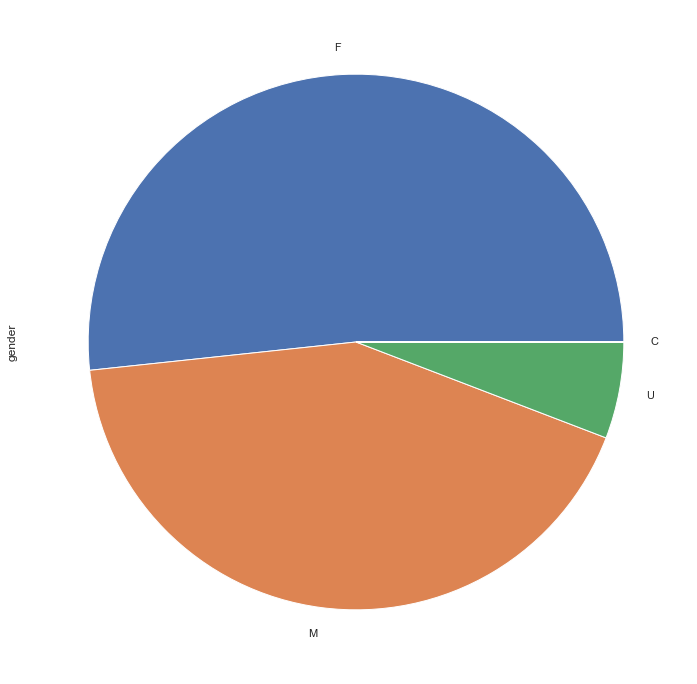

In [300]:
dfMM['gender'].value_counts().plot(kind='pie', figsize=(12, 24))

Text(0, 0.5, 'Total')

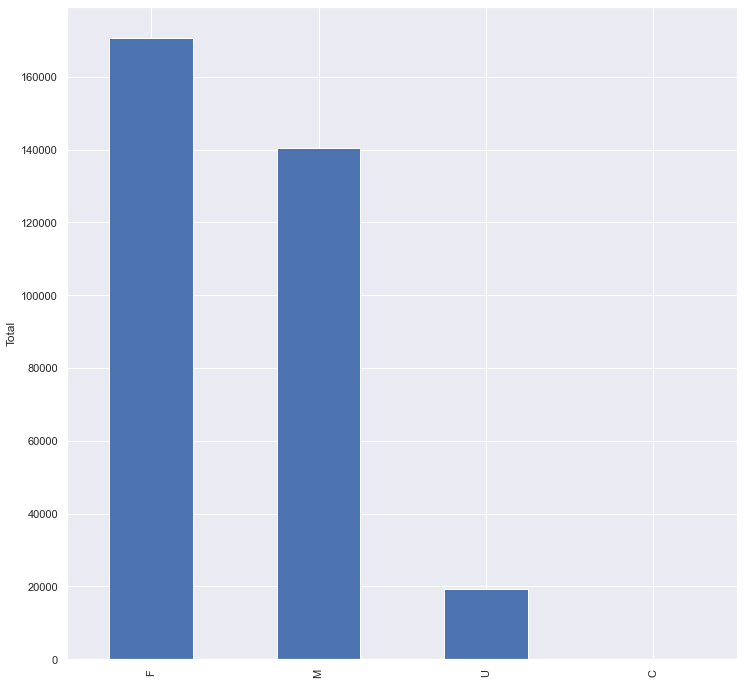

In [301]:
ax = dfMM['gender'].value_counts().plot(kind='bar', figsize=(12, 12))
ax.set_ylabel('Total')

## Member Data - status

<AxesSubplot:ylabel='status'>

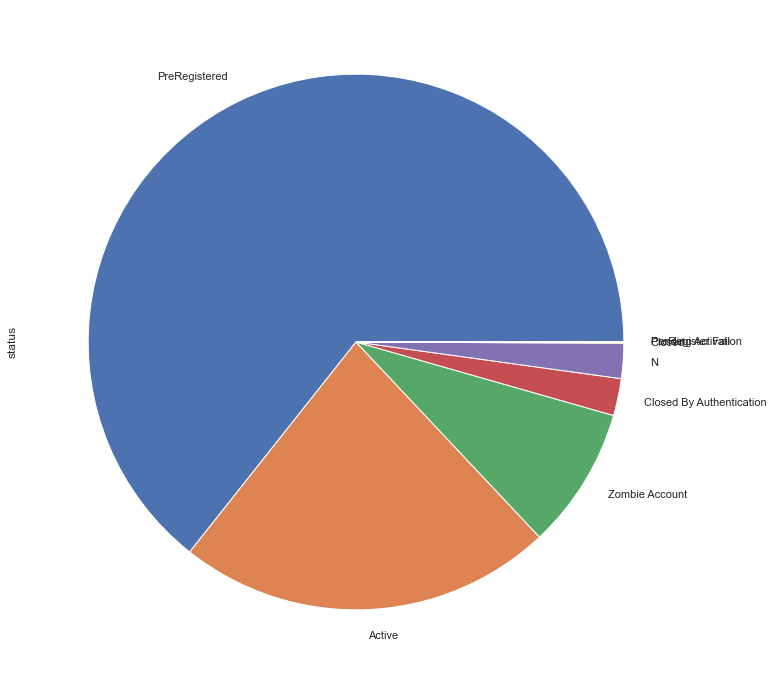

In [302]:
dfMM['status'].value_counts().plot(kind='pie', figsize=(12, 24))

Text(0, 0.5, 'Total')

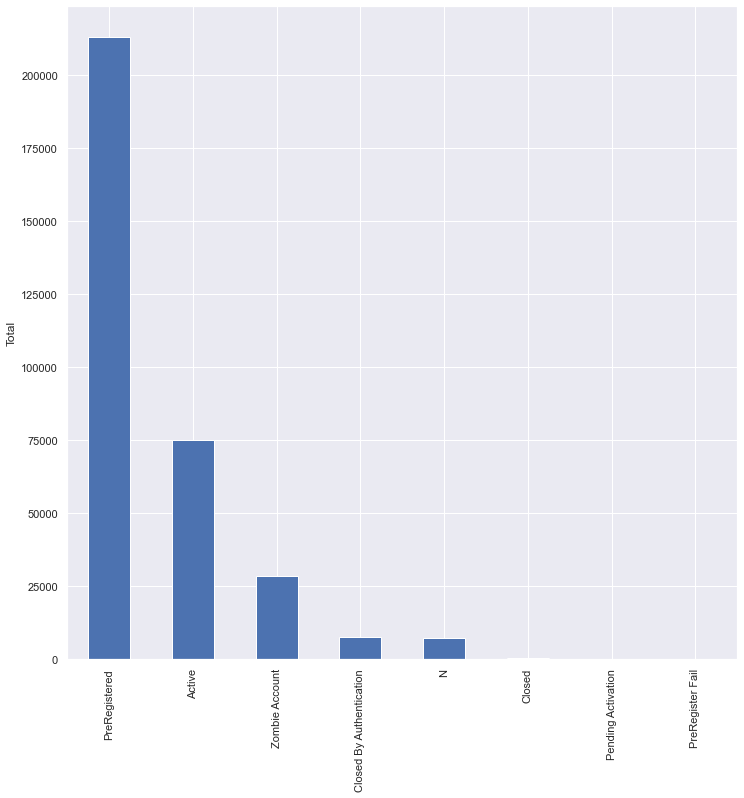

In [303]:
ax = dfMM['status'].value_counts().plot(kind='bar', figsize=(12, 12))
ax.set_ylabel('Total')

# RFM Analysis on Member data
'member_type', 'registration', 'gained_point', 'spent_point', 'current_point', 'last_login', 'language', 'gender', 'dob', 'premium_paid', 'optoutstatus', 'status', 'customer_id', 'id_hash'
## Member - Recency

In [304]:
dfMM.last_login = pd.to_datetime(dfMM.last_login)
display(dfMM['last_login'].min())
display(dfMM['last_login'].max())

# Looks like Member Data almost up to latest date.

Timestamp('2017-05-05 02:47:03.168650')

Timestamp('2022-09-06 09:44:37')

In [305]:
dfMM_tmp = dfMM.dropna() # remove some null values

now = DT.datetime.now() #<---- the latest date today
recency_dfMM = dfMM_tmp.groupby(by='customer_id', as_index=False)['last_login'].max()
recency_dfMM['Recency'] = recency_dfMM['last_login'].apply(lambda x: (now - x).days)
recency_dfMM.drop('last_login',axis=1,inplace=True)
recency_dfMM.head()

# this is recency (around 5 years till now)

,customer_id,Recency
0,0000efb390b90bd496bf56e7b839a520c987fe0e9fd856...,82
1,000152e15dc8b596ce46e06de1a30751d072a0311a1579...,58
2,000306cda80494b8f07e69c10ff980353a22b7410c53c2...,9
3,0005c96f36b9797b3da74d7d617c7b0e42c13fcf5c4d3e...,40
4,0007c17ea2e31b687caf51e4f8cdc70fccf9e38ae0ee74...,79


## Member - Frequency

In [306]:
dfMM_copy = dfMM_tmp;
dfMM_copy.astype(str).drop_duplicates(subset = ['registration', 'customer_id'], keep = "first", inplace = True)

freqdfMM = dfMM_copy.groupby(by=['customer_id'], as_index=False)['registration'].count()
freqdfMM.columns = ['customer_id', 'Frequency']
freqdfMM.head()

# How many times a customer did visit and took action on the website?
#dfmi['one']['second'] = value
#dfmi.loc[:, ('one', 'second')] = value

,customer_id,Frequency
0,0000efb390b90bd496bf56e7b839a520c987fe0e9fd856...,1
1,000152e15dc8b596ce46e06de1a30751d072a0311a1579...,1
2,000306cda80494b8f07e69c10ff980353a22b7410c53c2...,1
3,0005c96f36b9797b3da74d7d617c7b0e42c13fcf5c4d3e...,1
4,0007c17ea2e31b687caf51e4f8cdc70fccf9e38ae0ee74...,1


## Member - Monetry

In [323]:
monetary_dfMM = dfMM_tmp.groupby(by='customer_id',as_index=False).agg({'premium_paid': 'sum'})
monetary_dfMM.columns = ['customer_id','Monetry']
monetary_dfMM.head()

,customer_id,Monetry
0,0000efb390b90bd496bf56e7b839a520c987fe0e9fd856...,8916.240000
1,000152e15dc8b596ce46e06de1a30751d072a0311a1579...,80622.710000
2,000306cda80494b8f07e69c10ff980353a22b7410c53c2...,18774.160000
3,0005c96f36b9797b3da74d7d617c7b0e42c13fcf5c4d3e...,549086.560000
4,0007c17ea2e31b687caf51e4f8cdc70fccf9e38ae0ee74...,130653.110000


## Member - RFM table

In [324]:
dfMM_RFM = recency_dfMM.merge(freqdfMM, on='customer_id')
dfMM_RFM = dfMM_RFM.merge(monetary_dfMM, on='customer_id')
dfMM_RFM.head(10)

,customer_id,Recency,Frequency,Monetry
0,0000efb390b90bd496bf56e7b839a520c987fe0e9fd856...,82,1,8916.240000
1,000152e15dc8b596ce46e06de1a30751d072a0311a1579...,58,1,80622.710000
2,000306cda80494b8f07e69c10ff980353a22b7410c53c2...,9,1,18774.160000
3,0005c96f36b9797b3da74d7d617c7b0e42c13fcf5c4d3e...,40,1,549086.560000
4,0007c17ea2e31b687caf51e4f8cdc70fccf9e38ae0ee74...,79,1,130653.110000
5,0008f8d25ac0ab9477b66fecdf888b6378779dbb687f30...,149,1,9989.430000
6,000ab3835af1a1bb16f43bf38649754481140462ec0f5f...,680,1,4332.310000
7,000bc307b0157d6e544dbbd896ec0b1c0b6823c7b858c3...,23,1,1929504.690000
8,000d9603ce5c20c8f35ec59215ae8a850f36cad7bf7e0a...,8,1,451567.990000
9,000dfd13d18ffc9b270fadcaac4cce080a93254b7733ee...,141,1,80593.660000


# Policy Data
'customer_id', 'issue_date', 'end_date', 'termination_date', 'account_status', 'product_category', 'product_group', 'policy_hash'

In [309]:
display(len(dfPT))   #it has 2346069 ids
display(len(dfPT['customer_id'].drop_duplicates())) #it has 611224 unique ids

2346069

611224

In [310]:
display(dfPT['account_status'].value_counts()) # has 12 status types
display(dfPT['product_category'].value_counts()) # has 24 product types
display(dfPT['product_group'].value_counts()) # has 2 product group types

Premium paying                   1740876
Surrendered                       264388
Lapsed                            216563
Paid-up                            45435
Converted                          37209
Matured                            26597
Terminated                          8426
Vanishing Premium (Whole)           4501
Paid-up life, RPU                   1111
Expired                              664
Vested Annuity                       215
Premium waiver or payor death         84
Name: account_status, dtype: int64

Whole Life        483695
PA                392887
Medical           183528
PKG               140359
Crisis            137488
HEALTH            127081
MOTOR             125426
FIRE               75495
Universal Life     64226
DHI                50942
Investment         36591
Term Life          35219
Savings            30810
Accident           22172
ECI                18867
Disability         14585
ACCD                7981
Others              7328
ENG                 4476
HULL                1025
PAG                   43
ICI                   37
GADGET                15
CARGO                  1
Name: product_category, dtype: int64

GI      1330392
Life    1015642
Name: product_group, dtype: int64

## Policy Data - account status

<AxesSubplot:ylabel='account_status'>

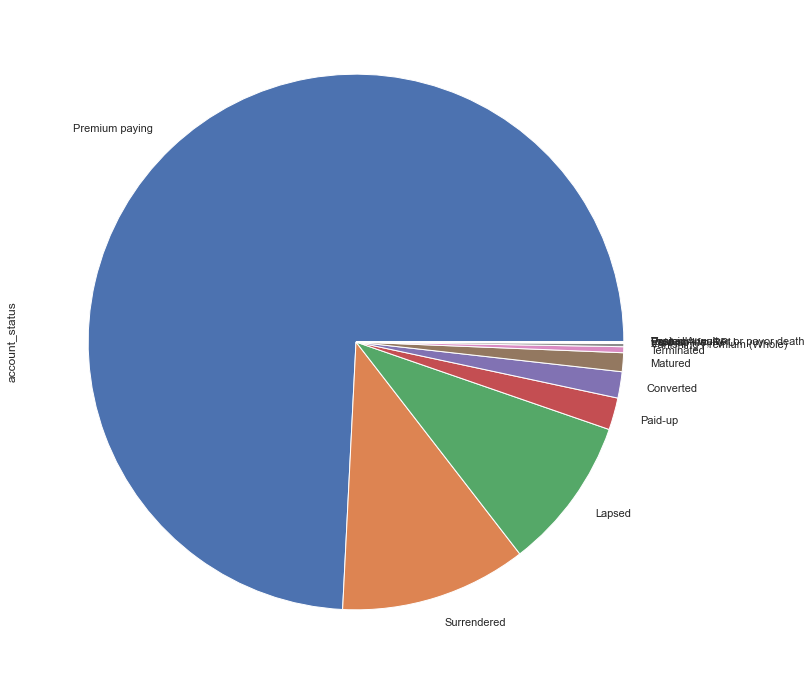

In [311]:
dfPT['account_status'].value_counts().plot(kind='pie', figsize=(12, 24))

Text(0, 0.5, 'Total')

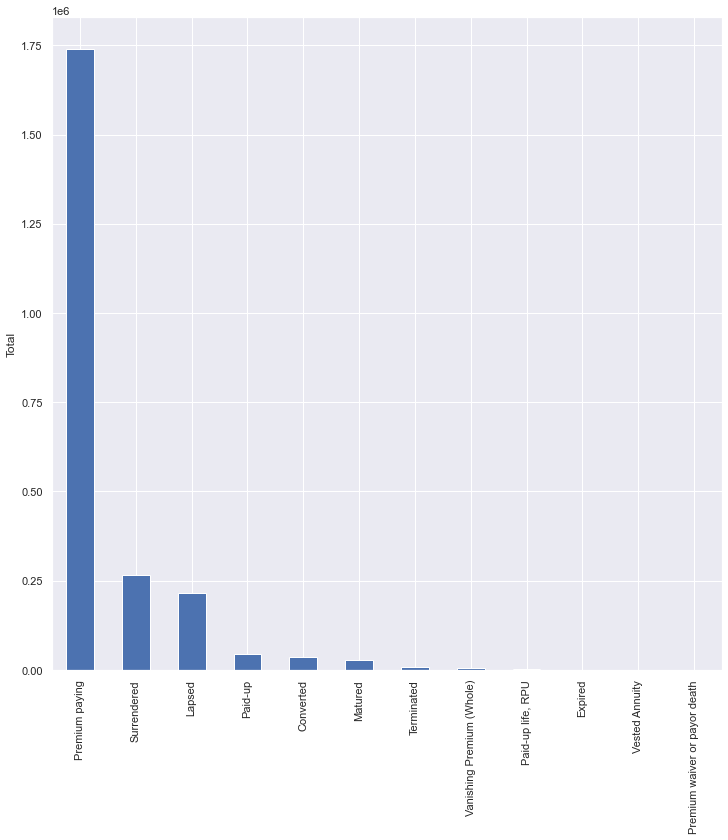

In [312]:
ax = dfPT['account_status'].value_counts().plot(kind='bar', figsize=(12, 12))
ax.set_ylabel('Total')

## Policy Data - product-category

<AxesSubplot:ylabel='product_category'>

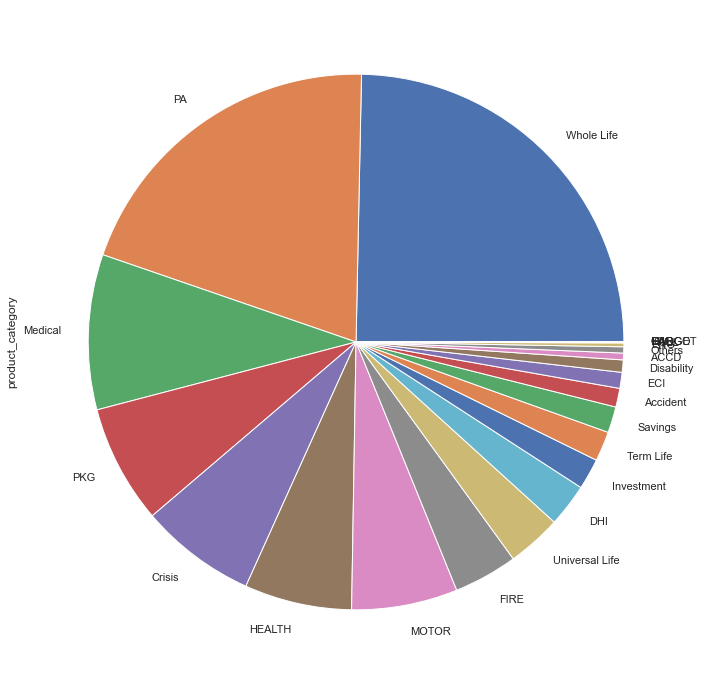

In [313]:
dfPT['product_category'].value_counts().plot(kind='pie', figsize=(12, 24))

Text(0, 0.5, 'Total')

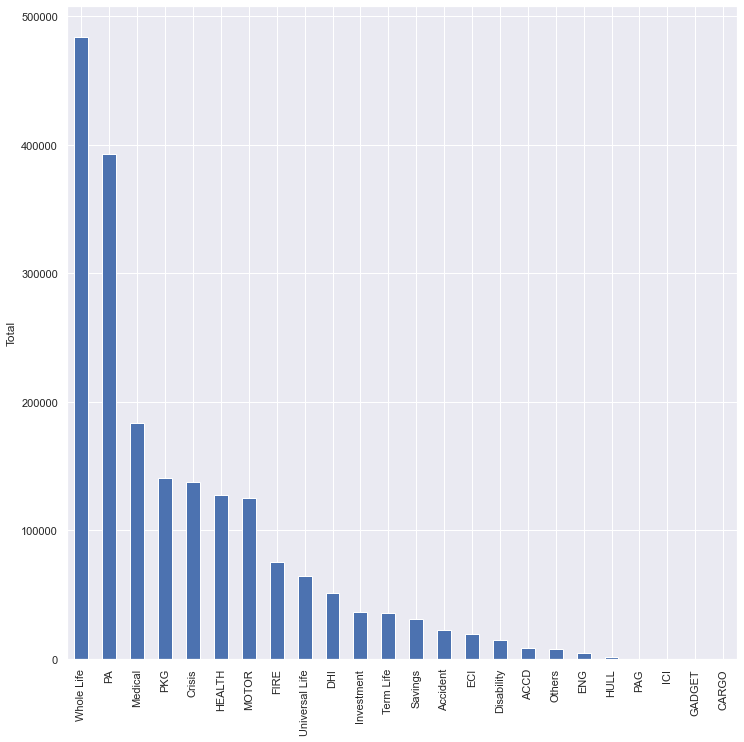

In [314]:
ax = dfPT['product_category'].value_counts().plot(kind='bar', figsize=(12, 12))
ax.set_ylabel('Total')

## Policy Data - product-group

<AxesSubplot:ylabel='product_group'>

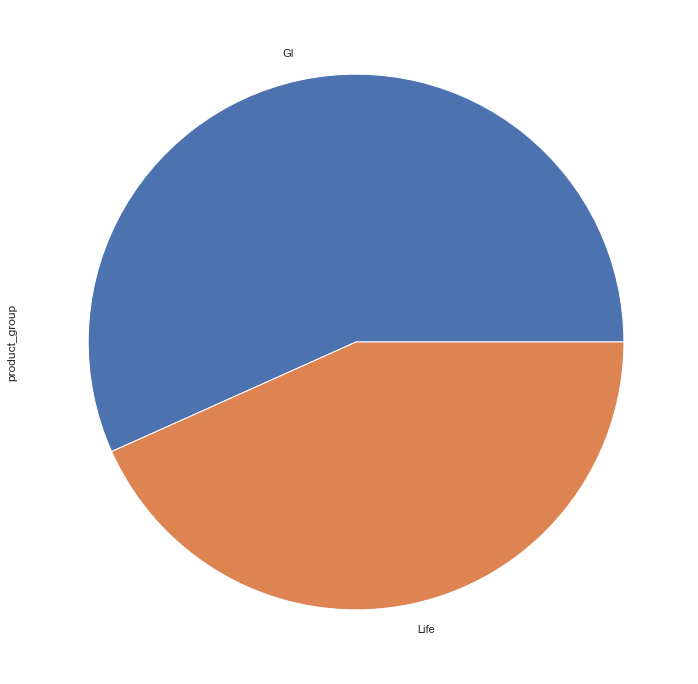

In [315]:
dfPT['product_group'].value_counts().plot(kind='pie', figsize=(12, 24))

Text(0, 0.5, 'Total')

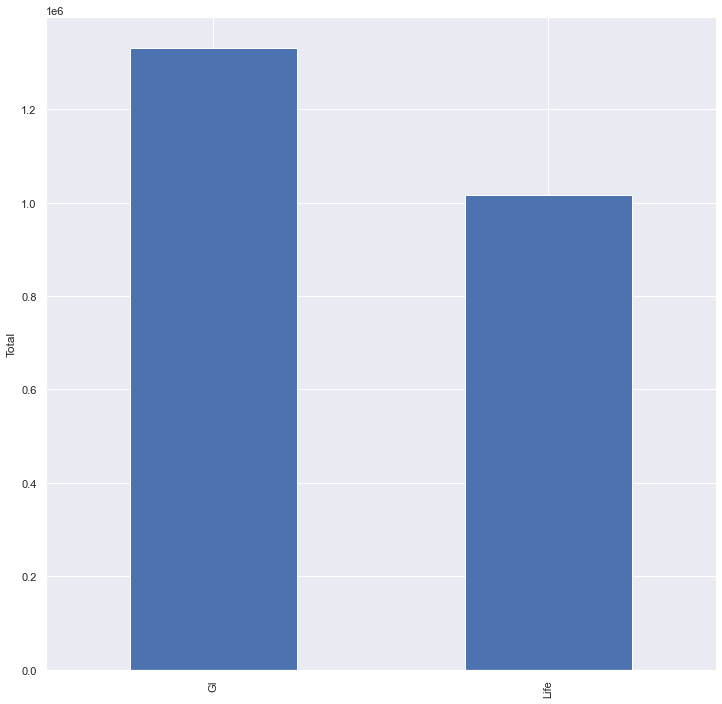

In [316]:
ax = dfPT['product_group'].value_counts().plot(kind='bar', figsize=(12, 12))
ax.set_ylabel('Total')

# RFD Analysis - Policy
'customer_id', 'issue_date', 'end_date', 'termination_date', 'account_status', 'product_category', 'product_group', 'policy_hash'
## Policy - Recency

In [317]:
pd.options.mode.chained_assignment = None
display(dfPT['issue_date'].min())
display(dfPT['issue_date'].max())

# since 1984

'1984-07-01'

'2022-09-05'

In [318]:
dfPT_tmp = dfPT.dropna() # remove some null values
dfPT_tmp.issue_date = pd.to_datetime(dfPT_tmp.issue_date)

now = DT.datetime.now() #<---- the latest date today
recency_dfPT = dfPT_tmp.groupby(by='customer_id', as_index=False)['issue_date'].max()
recency_dfPT['Recency'] = recency_dfPT['issue_date'].apply(lambda x: (now - x).days)
recency_dfPT.drop('issue_date',axis=1,inplace=True)
recency_dfPT.head()

# this is recency since 1984

,customer_id,Recency
0,00030457b75b3ab16d689b8172f4451dc876b501a5ec3a...,1096
1,0005ae1cdaeb68f3029b397736478cf0de5b3acf240450...,2986
2,00082bacbefb0f6f587cbb2e73d0ac249d3982b132ab76...,3268
3,000aff8aa551e410a7b7c47b9323987aef54e893a4c997...,587
4,000b571c89d46690ca3638913f969553833b2b7065022a...,2197


## Policy - Frequency

In [319]:
dfPT_copy = dfPT_tmp;
dfPT_copy.astype(str).drop_duplicates(subset = ['product_group', 'customer_id'], keep = "first", inplace = True)

freqdfPT = dfPT_copy.groupby(by=['customer_id'], as_index=False)['product_group'].count()
freqdfPT.columns = ['customer_id', 'Frequency']
freqdfPT.head()

,customer_id,Frequency
0,00030457b75b3ab16d689b8172f4451dc876b501a5ec3a...,1
1,0005ae1cdaeb68f3029b397736478cf0de5b3acf240450...,1
2,00082bacbefb0f6f587cbb2e73d0ac249d3982b132ab76...,1
3,000aff8aa551e410a7b7c47b9323987aef54e893a4c997...,1
4,000b571c89d46690ca3638913f969553833b2b7065022a...,1


## Policy - Duration

In [320]:
dfPT_tmp.termination_date = pd.to_datetime(dfPT_tmp.termination_date)
dfPT_tmp['Duration'] = dfPT_tmp['termination_date'] - dfPT_tmp['issue_date']

In [321]:
duration_dfPT = dfPT_tmp.groupby(by="customer_id", as_index=False).agg({'Duration': 'sum'})
duration_dfPT.columns = ['customer_id', 'duration']
duration_dfPT.head(20)

,customer_id,duration
0,00030457b75b3ab16d689b8172f4451dc876b501a5ec3a...,0 days
1,0005ae1cdaeb68f3029b397736478cf0de5b3acf240450...,205 days
2,00082bacbefb0f6f587cbb2e73d0ac249d3982b132ab76...,161 days
3,000aff8aa551e410a7b7c47b9323987aef54e893a4c997...,0 days
4,000b571c89d46690ca3638913f969553833b2b7065022a...,0 days
5,00121bb86209ab48dfe993fe6de694cad0ff1c2eedf6a6...,0 days
6,0012a7848b8b32876d8dff8b79b1abeff1f3b30d0bc10f...,0 days
7,001e387518ab180d053e510764f91e91b1e83124b08d40...,345 days
8,0025509891133a8accc90a409334e7276c4d041b529df6...,297 days
9,002d9282172a321e5c14b42fa06ef1391ec9272ad109cb...,0 days


## Policy - RFD table

In [322]:
dfPT_RFD = recency_dfPT.merge(freqdfPT, on='customer_id')
dfPT_RFD = dfPT_RFD.merge(duration_dfPT, on='customer_id')
dfPT_RFD.head(10)

,customer_id,Recency,Frequency,duration
0,00030457b75b3ab16d689b8172f4451dc876b501a5ec3a...,1096,1,0 days
1,0005ae1cdaeb68f3029b397736478cf0de5b3acf240450...,2986,1,205 days
2,00082bacbefb0f6f587cbb2e73d0ac249d3982b132ab76...,3268,1,161 days
3,000aff8aa551e410a7b7c47b9323987aef54e893a4c997...,587,1,0 days
4,000b571c89d46690ca3638913f969553833b2b7065022a...,2197,1,0 days
5,00121bb86209ab48dfe993fe6de694cad0ff1c2eedf6a6...,287,1,0 days
6,0012a7848b8b32876d8dff8b79b1abeff1f3b30d0bc10f...,1194,1,0 days
7,001e387518ab180d053e510764f91e91b1e83124b08d40...,3080,1,345 days
8,0025509891133a8accc90a409334e7276c4d041b529df6...,562,1,297 days
9,002d9282172a321e5c14b42fa06ef1391ec9272ad109cb...,1762,1,0 days
